# Análisis de datos de COVID-19 en México

En este trabajo hacemos uso de los recursos usados en Clubes de Ciencia México edición Challenge Online 2020

Descargar datos:


https://coronavirus.gob.mx/datos/

En el enlace anterior nos dirijimos a la parte de descargas y seleccionamos catálogo CSV, después en la sección de Casos diarios por Estado +  Nacional hacemos uso de los datos en la parte de selección de tipo de casos, descargamos los confirmados para trabajar con ellos.

### Crear dataframe 

In [7]:
import pandas as pd
df = pd.read_csv('Casos_Diarios_Estado_Nacional_Confirmados_20200806.csv',index_col = 2) 
df.drop(['cve_ent','poblacion'], axis=1, inplace=True)
df.drop(df.loc[:,'01-08-2020':'06-08-2020'].columns, axis = 1, inplace=True)
df=df[:-1]
df.index.names = ['estado']
df.columns.names = ['fecha']
df.head()

fecha,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,...,22-07-2020,23-07-2020,24-07-2020,25-07-2020,26-07-2020,27-07-2020,28-07-2020,29-07-2020,30-07-2020,31-07-2020
estado,,,,,,,,,,,,,,,,,,,,,
AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0,...,50,72,72,17,20,69,59,57,56,47
BAJA CALIFORNIA,0,0,0,0,0,0,0,0,0,0,...,106,106,119,69,56,114,69,83,86,67
BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,0,0,0,...,111,107,79,54,32,168,152,120,146,93
CAMPECHE,0,0,0,0,0,0,0,0,0,0,...,84,79,79,30,21,64,81,67,55,49
CHIAPAS,0,0,0,0,0,0,0,0,0,0,...,21,17,34,13,14,20,23,18,17,24


### Análisis de componentes principales 

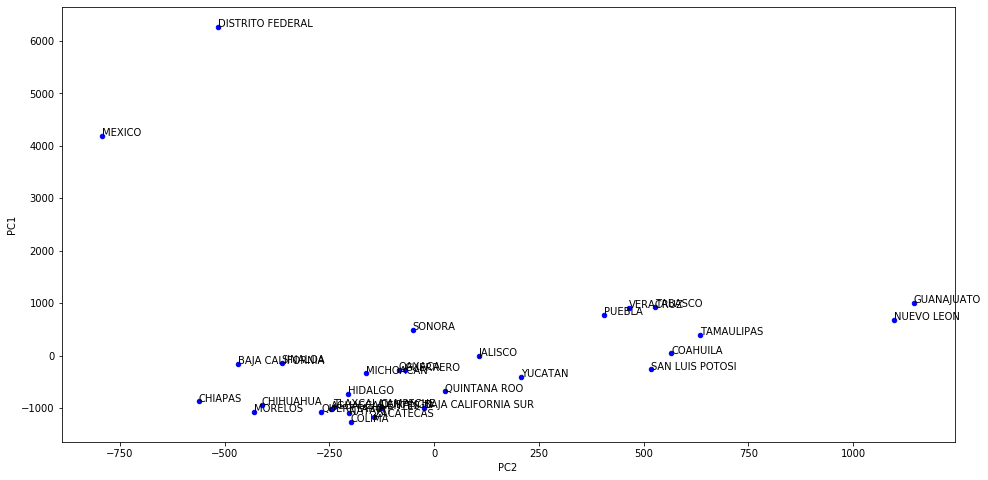

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

existing_2d = pca.transform(df)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = df.index
existing_df_2d.columns = ['PC1','PC2']

%matplotlib inline

ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', color='Blue', figsize=(16,8))

for i, country in enumerate(df.index):
    ax.annotate(country, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))

### Colores
https://matplotlib.org/3.1.0/gallery/color/named_colors.html 

### Clustering - K-means 

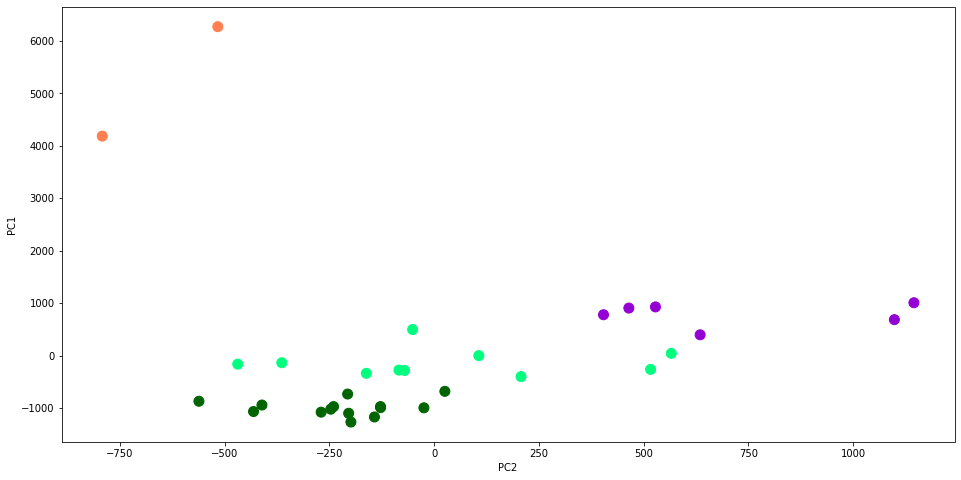

In [13]:
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(1234)
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit(df)
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)

import numpy as np
styles = ['darkviolet','springgreen','coral','darkgreen']
existing_df_2d.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=[styles[i] for i in existing_df_2d.cluster.astype(np.int)],
    s=100,
    figsize=(16,8))

### Graficar promedio de casos por grupo

Text(0, 0.5, 'Casos confirmados')

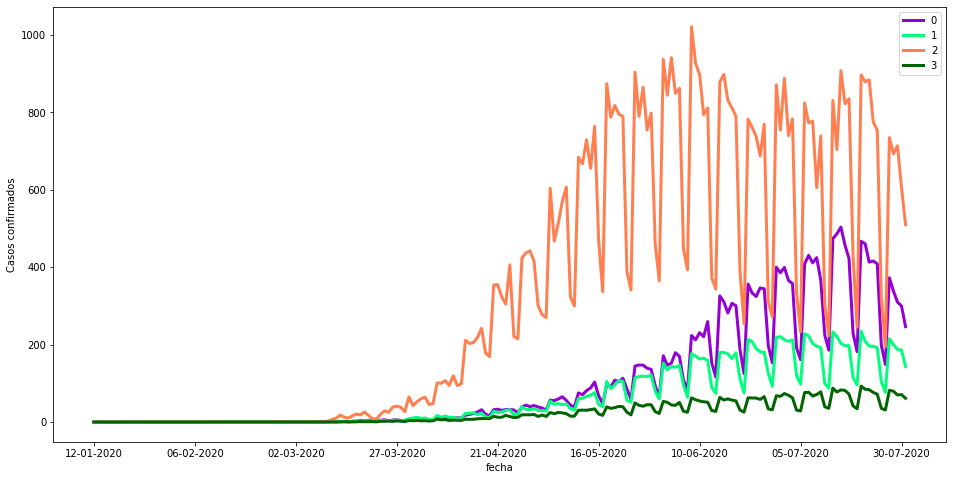

In [14]:
cluster_centers_df = pd.DataFrame(
    clusters.cluster_centers_, 
    index=['0','1','2','3']) 
cluster_centers_df.columns = df.columns

ax = cluster_centers_df.T.plot(
    figsize=(16,8),
    style=styles,
    linewidth = 3)
ax.set_ylabel("Casos confirmados")

### Identificar clusters 

In [18]:
existing_df_2d[existing_df_2d.cluster == 0].index

Index(['GUANAJUATO', 'NUEVO LEON', 'PUEBLA', 'TABASCO', 'TAMAULIPAS',
       'VERACRUZ'],
      dtype='object', name='estado')